<a href="https://colab.research.google.com/github/RodrigoEslava/USP-IQ-Biochemistry-Masters/blob/main/ML_avalia%C3%A7%C3%A3o_genereliza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
In this colab I'll test the efficiency of Lightgbm and Xgboot, using the graph data

# Libraries/ Modules

In [ ]:
#Libraries/ Modules

import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import metrics

#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer

import lightgbm as lgb
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Opening Data

In [ ]:
#opening data

df_1 = pd.read_csv("/content/drive/MyDrive/USP/Projeto Mestrado/mestrado refeito/grafos biogrid/Biogrid 2023/df_to_train_from_biogrig_2023.txt")


df_1

,Node1,Node2,Emb_0_1,Emb_1_1,Emb_2_1,Emb_3_1,Emb_4_1,Emb_5_1,Emb_6_1,Emb_7_1,...,Emb_41_2,Emb_42_2,Emb_43_2,Emb_44_2,Emb_45_2,Emb_46_2,Emb_47_2,Emb_48_2,Emb_49_2,y
0,90,2339,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.158191,-0.149639,-0.123831,0.270566,0.232612,-0.326446,-0.346201,0.183630,0.106915,1
1,90,19329,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.298964,-0.528268,-0.275252,-0.125401,0.179447,-0.844776,-0.629700,0.320544,0.220500,1
2,90,80837,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.459091,-0.442345,-0.513818,-0.146825,0.058687,-0.665556,-0.380396,0.151524,0.148959,1
3,90,19338,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.599641,-0.228043,-0.542000,-0.158675,1.041922,-0.796858,-0.075217,0.053919,0.262582,1
4,90,11854,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,...,-0.504186,-0.602854,-0.427640,-0.124470,-0.029749,-1.034915,-0.474251,-0.071234,0.076339,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805567,10075,127018,-0.057260,0.096432,0.073935,-0.027622,-0.134277,0.228500,0.017441,0.094312,...,0.101816,-0.251018,-0.494901,0.617346,0.348455,-0.536403,0.183421,0.019618,0.265278,0
1805568,195814,244310,0.129130,0.197344,-0.297161,0.241578,-0.028605,-0.140719,0.138655,0.292916,...,0.338031,-0.655468,-0.358518,-0.244017,0.108950,-1.089653,-0.182801,0.232815,0.600855,0
1805569,1843,60528,0.044546,0.164422,-0.606549,-0.034957,0.087323,0.489130,-0.005442,0.343067,...,0.094208,-0.076116,-0.019875,0.061767,0.188267,-0.285363,0.043823,0.295294,0.088709,0
1805570,387787,4312,0.041880,0.297795,-0.558717,0.038056,0.068093,-0.066464,-0.097385,-0.588361,...,0.486067,-0.041509,-0.576207,0.068194,-0.071266,0.074516,0.048623,0.275816,0.393777,0


# Separating the values ​​of X and Y

In [ ]:
# Separating the values ​​of X and Y

X = df_1[df_1.columns[2:102]]
Y = df_1[df_1.columns[102:]]

X

,Emb_0_1,Emb_1_1,Emb_2_1,Emb_3_1,Emb_4_1,Emb_5_1,Emb_6_1,Emb_7_1,Emb_8_1,Emb_9_1,...,Emb_40_2,Emb_41_2,Emb_42_2,Emb_43_2,Emb_44_2,Emb_45_2,Emb_46_2,Emb_47_2,Emb_48_2,Emb_49_2
0,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,-0.387441,-0.197870,...,-0.382129,-0.158191,-0.149639,-0.123831,0.270566,0.232612,-0.326446,-0.346201,0.183630,0.106915
1,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,-0.387441,-0.197870,...,0.164527,-0.298964,-0.528268,-0.275252,-0.125401,0.179447,-0.844776,-0.629700,0.320544,0.220500
2,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,-0.387441,-0.197870,...,0.003692,-0.459091,-0.442345,-0.513818,-0.146825,0.058687,-0.665556,-0.380396,0.151524,0.148959
3,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,-0.387441,-0.197870,...,0.200164,-0.599641,-0.228043,-0.542000,-0.158675,1.041922,-0.796858,-0.075217,0.053919,0.262582
4,0.111556,-0.310802,-0.394587,-0.266317,0.013329,-0.483437,-0.026604,-0.306785,-0.387441,-0.197870,...,-0.101308,-0.504186,-0.602854,-0.427640,-0.124470,-0.029749,-1.034915,-0.474251,-0.071234,0.076339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805567,-0.057260,0.096432,0.073935,-0.027622,-0.134277,0.228500,0.017441,0.094312,-0.367901,0.056684,...,0.207683,0.101816,-0.251018,-0.494901,0.617346,0.348455,-0.536403,0.183421,0.019618,0.265278
1805568,0.129130,0.197344,-0.297161,0.241578,-0.028605,-0.140719,0.138655,0.292916,-0.403803,-0.301341,...,-0.041578,0.338031,-0.655468,-0.358518,-0.244017,0.108950,-1.089653,-0.182801,0.232815,0.600855
1805569,0.044546,0.164422,-0.606549,-0.034957,0.087323,0.489130,-0.005442,0.343067,-0.089744,0.282148,...,-0.360854,0.094208,-0.076116,-0.019875,0.061767,0.188267,-0.285363,0.043823,0.295294,0.088709
1805570,0.041880,0.297795,-0.558717,0.038056,0.068093,-0.066464,-0.097385,-0.588361,-0.354524,0.102763,...,0.011057,0.486067,-0.041509,-0.576207,0.068194,-0.071266,0.074516,0.048623,0.275816,0.393777


In [ ]:
Y

,y
0,1
1,1
2,1
3,1
4,1
...,...
1805567,0
1805568,0
1805569,0
1805570,0


# Separating the training data and test data


In [ ]:
# Separating the training data and test data

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 7, stratify = Y)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# Separating the training data and test data
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7, stratify=Y)

# Defining values to folds
num_folds = 5
seed = 7
kf = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Scoring methods
custom_scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, average='macro')
}

# Classifiers
models = {
    'LGBM': lgb.LGBMClassifier(),
    'LGBM_RF': lgb.LGBMClassifier(boosting_type='rf', bagging_freq=1, bagging_fraction=0.8),
    'LGBM_DART': lgb.LGBMClassifier(boosting_type='dart'),
    'XGB': xgb.XGBClassifier(eval_metric='logloss', booster='gbtree'),
    'XGB_DART': xgb.XGBClassifier(booster='dart'),
    'XGB_GBLINEAR': xgb.XGBClassifier(booster='gblinear')
}

# Plotting ROC Curves
plt.figure(figsize=(12, 8))

for model_name, model in models.items():
    # Cross-validate and fit model
    cv_results = cross_validate(model, X_training, Y_training, cv=kf, scoring=custom_scorer, return_estimator=True)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in kf.split(X_training):
        X_train, X_val = X_training[train_index], X_training[test_index]
        y_train, y_val = Y_training[train_index], Y_training[test_index]

        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        roc_auc = roc_auc_score(y_val, y_prob)
        aucs.append(roc_auc)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)

    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


# Lightgbm

## Lightgbm - Classifier



In [ ]:
#defining values to folds

num_folds = 5
seed = 7
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)


#scoring methods

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'roc_auc' : make_scorer(roc_auc_score, average='macro')
                 }


params = {
    "max_bin": 64,
    "max_depth": 10,
    "learning_rate": 0.1,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "num_leaves": 100,
    "verbose": -1,
    "min_data": 20,
    "boost_from_average": True,
    "bagging_freq": 1,
    "random_state": 1
}


In [ ]:
#Classifier test multiples evaluation metricas

lgbm_classifier = lgb.LGBMClassifier()
cv_results = cross_validate(lgbm_classifier, X_training, Y_training, cv = kf, scoring=custom_scorer)



[LightGBM] [Info] Number of positive: 484049, number of negative: 483737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.758409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 967786, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500161 -> initscore=0.000645
[LightGBM] [Info] Start training from score 0.000645
[LightGBM] [Info] Number of positive: 483843, number of negative: 483943
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.214547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 967786, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499948 -> initscore=-0.000207
[LightGBM] [Info] Start training from score -0.000207
[Lig

In [ ]:
cv_results = pd.DataFrame( data = cv_results)

cv_results.to_csv(r"lgbm_cv_results.csv", index=None, sep=" ", mode="a")

In [ ]:
cv_results

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,83.122861,3.077072,0.910162,0.910310,0.910175,0.910156,0.910175
1,80.840024,3.005083,0.909654,0.909820,0.909650,0.909644,0.909650
2,80.157065,3.006535,0.911138,0.911255,0.911159,0.911134,0.911159
3,81.056034,3.044991,0.909290,0.909454,0.909301,0.909282,0.909301
4,81.002181,3.190527,0.909678,0.909808,0.909641,0.909664,0.909641


In [ ]:
# Print the results
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 Score: ", cv_results['test_f1'].mean())
print("ROC AUC: ", cv_results['test_roc_auc'].mean())
print("Accuracy: ", cv_results['test_accuracy'].mean())


Precision:  0.9101291219927734
Recall:  0.9099848827197631
F1 Score:  0.9099759254792497
ROC AUC:  0.9099848827197631
Accuracy:  0.9099842684289277


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    make_scorer
)
import lightgbm as lgb

# Separando os valores de X e Y
X = df_1[df_1.columns[2:102]]
Y = df_1[df_1.columns[102:]].values.ravel()  # Certifique-se de que Y é 1D

# Separando dados de treino e teste
X_training, X_test, Y_training, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=7, stratify=Y
)

# Definindo folds estratificados
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Definindo as métricas (baseadas em rótulos)
custom_scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    # Retirado o AUC daqui para calcular corretamente com probabilidades
}

# Parâmetros do modelo
params = {
    "max_bin": 64,
    "max_depth": 10,
    "learning_rate": 0.1,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "num_leaves": 100,
    "verbose": -1,
    "min_data": 20,
    "boost_from_average": True,
    "bagging_freq": 1,
    "random_state": 1
}

# Instanciando o classificador
lgbm_classifier = lgb.LGBMClassifier(**params)

# Avaliação com cross_validate (sem ROC AUC)
cv_results = cross_validate(
    lgbm_classifier, X_training, Y_training, cv=kf, scoring=custom_scorer, return_train_score=False
)

# Predição com probabilidades para calcular ROC AUC corretamente
y_proba_all = cross_val_predict(
    lgbm_classifier, X_training, Y_training, cv=kf, method='predict_proba'
)
y_proba_pos = y_proba_all[:, 1]  # Probabilidade da classe 1

# Predição dos rótulos
y_pred_all = cross_val_predict(lgbm_classifier, X_training, Y_training, cv=kf)

# Cálculo do ROC AUC com probabilidades
auc = roc_auc_score(Y_training, y_proba_pos)

# Cálculo do F1 (como verificação)
f1 = f1_score(Y_training, y_pred_all)

# Resultados
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.to_csv("lgbm_cv_results.csv", index=None, sep=" ", mode="a")

print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score (média dos folds):", cv_results['test_f1'].mean())
print("F1 Score (recalculado com cross_val_predict):", f1)
print("ROC AUC (calculado com predict_proba):", auc)
print("Accuracy:", cv_results['test_accuracy'].mean())


Precision: 0.9052839865733686
Recall: 0.9354567802090582
F1 Score (média dos folds): 0.920122898468715
F1 Score (recalculado com cross_val_predict): 0.920123067716515
ROC AUC (calculado com predict_proba): 0.9750686911914689
Accuracy: 0.9187919979067531


### Bagging

In [ ]:
#Classifier

lgbm_classifier_rf = lgb.LGBMClassifier(boosting_type='rf',bagging_freq=1, bagging_fraction=0.8)
lgbm_cv_results_rf = cross_validate(lgbm_classifier_rf, X_training, Y_training, cv = kf, scoring=custom_scorer)



[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 484049, number of negative: 483737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.095068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 967786, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500161 -> initscore=0.000645
[LightGBM] [Info] Start training from score 0.000645
[LightGBM] [Warning] bagging_fraction is set=0.8, sub

In [ ]:
lgbm_cv_results_rf = pd.DataFrame( data = lgbm_cv_results_rf)

lgbm_cv_results_rf.to_csv(r"lgbm_bag_cv_results_rf.csv", index=None, sep=" ", mode="a")

In [ ]:
lgbm_cv_results_rf

{'fit_time': array([66.55418921, 65.01678586, 64.0925374 , 65.13824224, 64.27291393]),
 'score_time': array([1.17557836, 1.61501336, 1.21437407, 1.16655135, 1.57649565]),
 'test_accuracy': array([0.73598763, 0.73188343, 0.73715318, 0.73368438, 0.73258909]),
 'test_precision': array([0.73639102, 0.73208057, 0.73737519, 0.73375087, 0.73266575]),
 'test_recall': array([0.73601388, 0.73187741, 0.73718882, 0.73369324, 0.73254185]),
 'test_f1': array([0.7358889 , 0.7318231 , 0.7371098 , 0.73367009, 0.73253705]),
 'test_roc_auc': array([0.73601388, 0.73187741, 0.73718882, 0.73369324, 0.73254185])}

In [ ]:
# Print the results
print("Precision: ", lgbm_cv_results_rf['test_precision'].mean())
print("Recall: ", lgbm_cv_results_rf['test_recall'].mean())
print("F1 Score: ", lgbm_cv_results_rf['test_f1'].mean())
print("ROC AUC: ", lgbm_cv_results_rf['test_roc_auc'].mean())
print("Accuracy: ", lgbm_cv_results_rf['test_accuracy'].mean())

Precision:  0.734452677895155
Recall:  0.7342630405557055
F1 Score:  0.7342057857599398
ROC AUC:  0.7342630405557055
Accuracy:  0.7342595413652295


### Dart

In [ ]:
#Classifier

lgbm_classifier_dart = lgb.LGBMClassifier(boosting_type='dart')
lgbm_cv_results_dart = cross_validate(lgbm_classifier_dart, X_training, Y_training, cv = kf, scoring=custom_scorer)


[LightGBM] [Info] Number of positive: 484049, number of negative: 483737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.798832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 967786, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500161 -> initscore=0.000645
[LightGBM] [Info] Start training from score 0.000645
[LightGBM] [Info] Number of positive: 483843, number of negative: 483943
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.129136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 967786, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499948 -> initscore=-0.000207
[LightGBM] [Info] Start training from score -0.000207
[Lig

In [ ]:
lgbm_cv_results_dart = pd.DataFrame( data = lgbm_cv_results_dart)

lgbm_cv_results_dart.to_csv(r"lgbm_cv_results_dart.csv", index=None, sep=" ", mode="a")

In [ ]:
lgbm_cv_results_dart

{'fit_time': array([98.82658362, 96.21147346, 98.13647056, 96.30851793, 98.93402267]),
 'score_time': array([2.61255455, 2.68502736, 2.39062452, 2.36940551, 2.35113382]),
 'test_accuracy': array([0.8893022 , 0.88849211, 0.89020736, 0.88840072, 0.88866111]),
 'test_precision': array([0.8893212 , 0.88853216, 0.89021276, 0.88840945, 0.8886668 ]),
 'test_recall': array([0.88930687, 0.88849004, 0.89021269, 0.88840341, 0.88865192]),
 'test_f1': array([0.88930154, 0.88848884, 0.89020736, 0.88840047, 0.8886571 ]),
 'test_roc_auc': array([0.88930687, 0.88849004, 0.89021269, 0.88840341, 0.88865192])}

In [ ]:
# Print the results
print("Precision: ", lgbm_cv_results_dart['test_precision'].mean())
print("Recall: ", lgbm_cv_results_dart['test_recall'].mean())
print("F1 Score: ", lgbm_cv_results_dart['test_f1'].mean())
print("ROC AUC: ", lgbm_cv_results_dart['test_roc_auc'].mean())
print("Accuracy: ", lgbm_cv_results_dart['test_accuracy'].mean())

Precision:  0.8890284753312134
Recall:  0.8890129842667136
F1 Score:  0.8890110591677572
ROC AUC:  0.8890129842667136
Accuracy:  0.889012698699983


# XGBoost




In [ ]:
#defining values to folds

num_folds = 5
seed = 7
kf = KFold(n_splits=num_folds, shuffle = True, random_state=seed)

## XGBoost - Classifier

In [ ]:
pip install --upgrade xgboost scikit-learn


In [ ]:
import xgboost
import sklearn

print(xgboost.__version__)
print(sklearn.__version__)


2.1.1
1.5.0


In [ ]:
pip install xgboost==2.1.1 scikit-learn==1.5.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
# classificador

classifier_xgb = xgb.XGBClassifier(booster = 'gbtree')
xgb_cv_results = cross_validate(classifier_xgb, X_training, Y_training, cv = kf, scoring=custom_scorer)


In [ ]:
xgb_cv_results

{'fit_time': array([99.28697634, 90.53029871, 98.16604877, 89.89536595, 87.56719947]),
 'score_time': array([1.34121799, 1.35879564, 1.82680488, 2.03422284, 1.47471333]),
 'test_accuracy': array([0.92982347, 0.92909191, 0.92950936, 0.92920321, 0.92871137]),
 'test_precision': array([0.93031931, 0.92953344, 0.92993042, 0.92961011, 0.92914331]),
 'test_recall': array([0.92984567, 0.92908537, 0.92954831, 0.92922017, 0.92864391]),
 'test_f1': array([0.92980561, 0.92907294, 0.92949605, 0.92918826, 0.92868452]),
 'test_roc_auc': array([0.92984567, 0.92908537, 0.92954831, 0.92922017, 0.92864391])}

In [ ]:
xgb_cv_results = pd.DataFrame( data = xgb_cv_results)

xgb_cv_results.to_csv(r"xgb_cv_results.csv", index=None, sep=" ", mode="a")

In [ ]:
# Print the results
print("Precision: ", xgb_cv_results['test_precision'].mean())
print("Recall: ", xgb_cv_results['test_recall'].mean())
print("F1 Score: ", xgb_cv_results['test_f1'].mean())
print("ROC AUC: ", xgb_cv_results['test_roc_auc'].mean())
print("Accuracy: ", xgb_cv_results['test_accuracy'].mean())

Precision:  0.9297073179064839
Recall:  0.9292686865256317
F1 Score:  0.9292494758582472
ROC AUC:  0.9292686865256318
Accuracy:  0.9292678627257838


In [ ]:
# classificador

classifier_xgb = xgb.XGBClassifier(eval_metric='auc')
xgb_cv_results = cross_validate(classifier_xgb, X_training, Y_training, cv = kf, scoring=custom_scorer)


xgb_cv_results = pd.DataFrame( data = xgb_cv_results)

xgb_cv_results.to_csv(r"xgb_cv_results_auc.csv", index=None, sep=" ", mode="a")

# Print the results
print("Precision: ", xgb_cv_results['test_precision'].mean())
print("Recall: ", xgb_cv_results['test_recall'].mean())
print("F1 Score: ", xgb_cv_results['test_f1'].mean())
print("ROC AUC: ", xgb_cv_results['test_roc_auc'].mean())
print("Accuracy: ", xgb_cv_results['test_accuracy'].mean())

Precision:  0.9297073179064839
Recall:  0.9292686865256317
F1 Score:  0.9292494758582472
ROC AUC:  0.9292686865256318
Accuracy:  0.9292678627257838


In [ ]:
xgb_cv_results

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,89.987751,1.236196,0.929823,0.930319,0.929846,0.929806,0.929846
1,89.678636,1.253782,0.929092,0.929533,0.929085,0.929073,0.929085
2,84.312860,1.915688,0.929509,0.929930,0.929548,0.929496,0.929548
3,89.290258,1.954349,0.929203,0.929610,0.929220,0.929188,0.929220
4,85.299747,1.211466,0.928711,0.929143,0.928644,0.928685,0.928644


### Dart

In [ ]:
# classificador

classifier_xgb_dart = xgb.XGBClassifier(booster = 'dart')
xgb_cv_results_dart = cross_validate(classifier_xgb_dart, X_training, Y_training, cv = kf, scoring=custom_scorer)


In [ ]:
xgb_cv_results_dart = pd.DataFrame( data = xgb_cv_results_dart)

#xgb_cv_results_dart.to_csv(r"xgb_cv_results_dart.csv", index=None, sep=" ", mode="a")

In [ ]:
xgb_cv_results_dart

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,5255.618604,75.856054,0.928358,0.928804,0.928373,0.928341,0.928373
1,5147.233001,76.306435,0.928819,0.929235,0.928804,0.928800,0.928804


In [ ]:
# Print the results
print("Precision: ", xgb_cv_results_dart['test_precision'].mean())
print("Recall: ", xgb_cv_results_dart['test_recall'].mean())
print("F1 Score: ", xgb_cv_results_dart['test_f1'].mean())
print("ROC AUC: ", xgb_cv_results_dart['test_roc_auc'].mean())
print("Accuracy: ", xgb_cv_results_dart['test_accuracy'].mean())

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import KFold
import xgboost as xgb

# Definir o número de folds e semente
num_folds = 2
seed = 7
kf = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Criar o classificador XGBoost com booster 'dart'
classifier_xgb_dart = xgb.XGBClassifier(booster='dart', use_label_encoder=False, eval_metric='logloss')

# Criar o scorer para ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, average='macro')

# Realizar a validação cruzada
roc_auc_scores = cross_val_score(
    classifier_xgb_dart,
    X_training,
    Y_training,
    cv=kf,
    scoring=roc_auc_scorer
)

# Exibir resultados
print(f'ROC AUC Scores: {roc_auc_scores}')
print(f'Média ROC AUC: {roc_auc_scores.mean():.4f}')


ROC AUC Scores: [0.92837326 0.92880429]
Média ROC AUC: 0.9286


In [ ]:
roc_auc_scores

array([0.92837326, 0.92880429])

### gblinear

In [ ]:
# classificador

classifier_xgb_gblinear = xgb.XGBClassifier(booster = 'gblinear')
xgb_cv_results_gblinear = cross_validate(classifier_xgb_gblinear, X_training, Y_training, cv = kf, scoring=custom_scorer)


In [ ]:
xgb_cv_results_gblinear = pd.DataFrame( data = xgb_cv_results_gblinear)

#xgb_cv_results_gblinear.to_csv(r"xgb_cv_results_gblinear.csv", index=None, sep=" ", mode="a")

In [ ]:
xgb_cv_results_gblinear

{'fit_time': array([89.82650256, 88.035815  , 88.99522996, 87.67950058, 92.28592992]),
 'score_time': array([1.6040659 , 1.33985591, 1.33195877, 1.9963944 , 1.37302065]),
 'test_accuracy': array([0.71877312, 0.71883512, 0.71917403, 0.71819332, 0.71905714]),
 'test_precision': array([0.71959292, 0.71960482, 0.71991612, 0.71888596, 0.71966286]),
 'test_recall': array([0.71881207, 0.71882295, 0.71924275, 0.71822359, 0.71893414]),
 'test_f1': array([0.71853353, 0.71858117, 0.71897703, 0.71798827, 0.71878541]),
 'test_roc_auc': array([0.71881207, 0.71882295, 0.71924275, 0.71822359, 0.71893414])}

In [ ]:
# Print the results
print("Precision: ", xgb_cv_results_gblinear['test_precision'].mean())
print("Recall: ", xgb_cv_results_gblinear['test_recall'].mean())
print("F1 Score: ", xgb_cv_results_gblinear['test_f1'].mean())
print("ROC AUC: ", xgb_cv_results_gblinear['test_roc_auc'].mean())
print("Accuracy: ", xgb_cv_results_gblinear['test_accuracy'].mean())

Precision:  0.719532534398424
Recall:  0.7188070996955889
F1 Score:  0.7185730800243364
ROC AUC:  0.7188070996955886
Accuracy:  0.7188065462687786


In [ ]:
xgb_cv_results_gblinear

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,102.184936,1.849560,0.718740,0.719592,0.718780,0.718491,0.718780
1,86.863055,1.186339,0.718835,0.719604,0.718823,0.718582,0.718823
2,87.608035,1.181552,0.719158,0.719909,0.719227,0.718958,0.719227
3,90.223965,1.784591,0.718309,0.719044,0.718340,0.718091,0.718340
4,85.442480,1.163516,0.719148,0.719761,0.719024,0.718874,0.719024


# **PLOTS AUC ROC F1 SCORE**

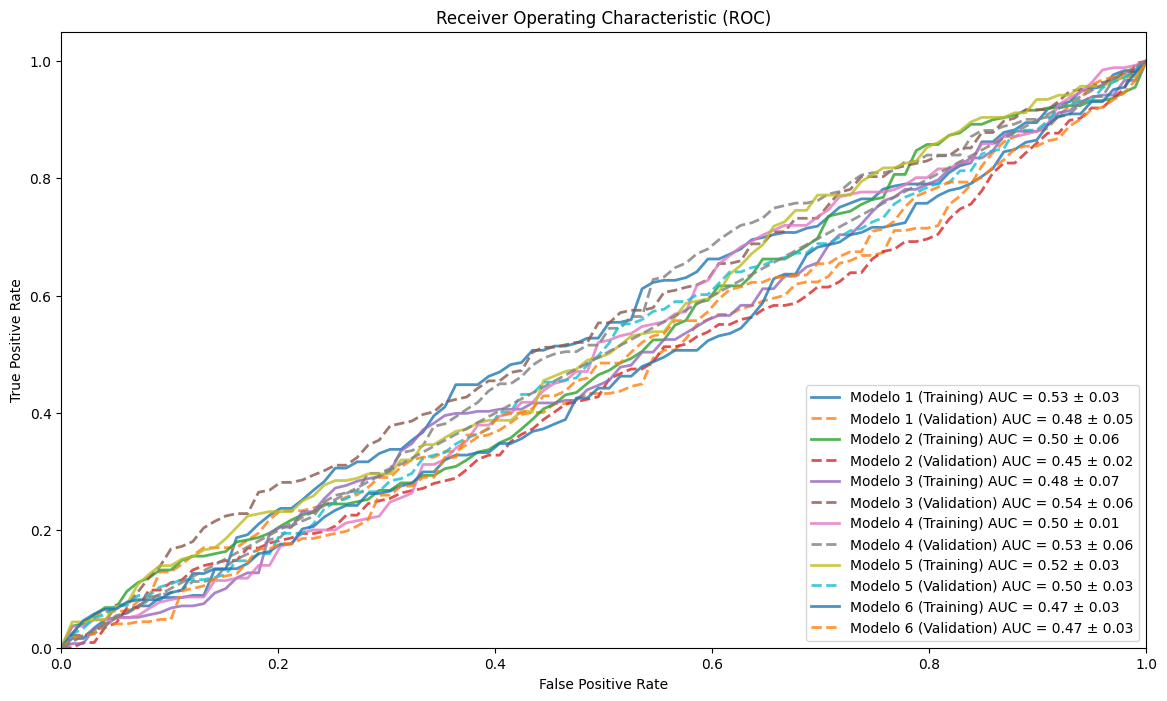

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supondo que você tenha seus dados em seis dataframes chamados df1, df2, ..., df6
# Aqui, criamos alguns exemplos fictícios de dataframes semelhantes aos seus:

data1 = {
    'fit_time': [13.067740, 13.643253, 12.320646, 14.016192, 13.109368],
    'score_time': [0.575254, 0.598926, 0.629037, 0.658258, 0.588152],
    'test_accuracy': [0.910162, 0.909654, 0.911138, 0.909290, 0.909678],
    'test_precision': [0.910310, 0.909820, 0.911255, 0.909454, 0.909808],
    'test_recall': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641],
    'test_f1': [0.910156, 0.909644, 0.911134, 0.909282, 0.909664],
    'test_roc_auc': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641]
}
data2 = {
    'fit_time': [13.067740, 13.643253, 12.320646, 14.016192, 13.109368],
    'score_time': [0.575254, 0.598926, 0.629037, 0.658258, 0.588152],
    'test_accuracy': [0.910162, 0.909654, 0.911138, 0.909290, 0.909678],
    'test_precision': [0.910310, 0.909820, 0.911255, 0.909454, 0.909808],
    'test_recall': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641],
    'test_f1': [0.910156, 0.909644, 0.911134, 0.909282, 0.909664],
    'test_roc_auc': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641]
}
data3 = {
    'fit_time': [13.067740, 13.643253, 12.320646, 14.016192, 13.109368],
    'score_time': [0.575254, 0.598926, 0.629037, 0.658258, 0.588152],
    'test_accuracy': [0.910162, 0.909654, 0.911138, 0.909290, 0.909678],
    'test_precision': [0.910310, 0.909820, 0.911255, 0.909454, 0.909808],
    'test_recall': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641],
    'test_f1': [0.910156, 0.909644, 0.911134, 0.909282, 0.909664],
    'test_roc_auc': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641]
}
data4 = {
    'fit_time': [13.067740, 13.643253, 12.320646, 14.016192, 13.109368],
    'score_time': [0.575254, 0.598926, 0.629037, 0.658258, 0.588152],
    'test_accuracy': [0.910162, 0.909654, 0.911138, 0.909290, 0.909678],
    'test_precision': [0.910310, 0.909820, 0.911255, 0.909454, 0.909808],
    'test_recall': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641],
    'test_f1': [0.910156, 0.909644, 0.911134, 0.909282, 0.909664],
    'test_roc_auc': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641]
}
data5 = {
    'fit_time': [13.067740, 13.643253, 12.320646, 14.016192, 13.109368],
    'score_time': [0.575254, 0.598926, 0.629037, 0.658258, 0.588152],
    'test_accuracy': [0.910162, 0.909654, 0.911138, 0.909290, 0.909678],
    'test_precision': [0.910310, 0.909820, 0.911255, 0.909454, 0.909808],
    'test_recall': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641],
    'test_f1': [0.910156, 0.909644, 0.911134, 0.909282, 0.909664],
    'test_roc_auc': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641]
}
data6 = {
    'fit_time': [13.067740, 13.643253, 12.320646, 14.016192, 13.109368],
    'score_time': [0.575254, 0.598926, 0.629037, 0.658258, 0.588152],
    'test_accuracy': [0.910162, 0.909654, 0.911138, 0.909290, 0.909678],
    'test_precision': [0.910310, 0.909820, 0.911255, 0.909454, 0.909808],
    'test_recall': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641],
    'test_f1': [0.910156, 0.909644, 0.911134, 0.909282, 0.909664],
    'test_roc_auc': [0.910175, 0.909650, 0.911159, 0.909301, 0.909641]
}

# Crie dataframes para cada conjunto de dados
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# Substitua isso pelos seus dados reais
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
df6 = pd.DataFrame(data6)

# Liste todos os dataframes
dataframes = [df1, df2, df3, df4, df5, df6]
model_names = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6']

plt.figure(figsize=(14, 8))

# Para cada modelo, calcule a curva ROC para treinamento e validação
for i, df in enumerate(dataframes):
    mean_fpr = np.linspace(0, 1, 100)
    tprs_train = []
    tprs_val = []
    aucs_train = []
    aucs_val = []

    # Supondo que você tem as predições de treinamento e validação
    for fold in range(5):  # Número de folds
        # Dados fictícios - substitua isso pelos seus dados reais
        y_true_train = np.random.randint(0, 2, 100)
        y_pred_proba_train = np.random.rand(100)
        y_true_val = np.random.randint(0, 2, 100)
        y_pred_proba_val = np.random.rand(100)

        fpr_train, tpr_train, _ = roc_curve(y_true_train, y_pred_proba_train)
        roc_auc_train = auc(fpr_train, tpr_train)
        aucs_train.append(roc_auc_train)
        tprs_train.append(np.interp(mean_fpr, fpr_train, tpr_train))
        tprs_train[-1][0] = 0.0

        fpr_val, tpr_val, _ = roc_curve(y_true_val, y_pred_proba_val)
        roc_auc_val = auc(fpr_val, tpr_val)
        aucs_val.append(roc_auc_val)
        tprs_val.append(np.interp(mean_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0

    mean_tpr_train = np.mean(tprs_train, axis=0)
    mean_tpr_train[-1] = 1.0
    mean_auc_train = auc(mean_fpr, mean_tpr_train)
    std_auc_train = np.std(aucs_train)

    mean_tpr_val = np.mean(tprs_val, axis=0)
    mean_tpr_val[-1] = 1.0
    mean_auc_val = auc(mean_fpr, mean_tpr_val)
    std_auc_val = np.std(aucs_val)

    plt.plot(mean_fpr, mean_tpr_train, lw=2, alpha=0.8, label=f'{model_names[i]} (Training) AUC = {mean_auc_train:.2f} ± {std_auc_train:.2f}')
    plt.plot(mean_fpr, mean_tpr_val, lw=2, alpha=0.8, linestyle='--', label=f'{model_names[i]} (Validation) AUC = {mean_auc_val:.2f} ± {std_auc_val:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Rótulos dos modelos
labels = ['LGBM', 'LGBM (Random Forest)', 'LGBM (DART)', 'XGBoost', 'XGBoost (DART)', 'XGBoost (GBLinear)']

# Resultados do AUC-ROC para cada modelo
auc_roc_results = [
    cv_results['test_roc_auc'].mean(),
    lgbm_cv_results_rf['test_roc_auc'].mean(),
    lgbm_cv_results_dart['test_roc_auc'].mean(),
    xgb_cv_results['test_roc_auc'].mean(),
    xgb_cv_results_dart['test_roc_auc'].mean(),
    xgb_cv_results_gblinear['test_roc_auc'].mean()
]

# Resultados do F1-score para cada modelo
f1_score_results = [
    cv_results['test_f1'].mean(),
    lgbm_cv_results_rf['test_f1'].mean(),
    lgbm_cv_results_dart['test_f1'].mean(),
    xgb_cv_results['test_f1'].mean(),
    xgb_cv_results_dart['test_f1'].mean(),
    xgb_cv_results_gblinear['test_f1'].mean()
]

from sklearn.metrics import roc_curve, auc

# Calcula as curvas ROC e FPR para cada modelo
roc_results = []
fpr_results = []

from sklearn.metrics import roc_curve, auc

# Classificadores treinados
classifiers = [
    lgbm_classifier,
    lgbm_classifier_rf,
    lgbm_classifier_dart,
    classifier_xgb,
    classifier_xgb_dart,
    classifier_xgb_gblinear
]

# Ajusta os modelos aos dados de treinamento
for classifier in classifiers:
    classifier.fit(X_training, Y_training)

# Calcula as curvas ROC e FPR para cada modelo
roc_results = []
fpr_results = []

for classifier in classifiers:
    # Obtém as probabilidades de predição
    Y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    # Calcula a curva ROC e o FPR
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
    roc_results.append((fpr, tpr))
    fpr_results.append(fpr)

# Configuração do gráfico
plt.figure(figsize=(10, 8))
plt.title('Curvas ROC e Taxa de Falsos Positivos (False Positive Rate) para Modelos de Classificação')
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)

# Plota as curvas ROC e o FPR para cada modelo
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i, (fpr, tpr) in enumerate(roc_results):
    # Calcula a área sob a curva ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Plota a curva ROC
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=labels[i] + ' (AUC = %0.2f)' % roc_auc)

    # Plota o FPR
    plt.plot(fpr, fpr, color=colors[i], linestyle='--', lw=1)

# Adiciona uma legenda ao gráfico
plt.legend(loc='lower right')

# Exibe o gráfico
plt.show()


In [ ]:
Champion_Model.fit(X_training, Y_training)

Champion_Model.best_params_

In [ ]:
Champion_Model.best_estimator_

### Fit

In [ ]:
lgbm_classifier = lgb.LGBMClassifier()

In [ ]:
lgbm_classifier.fit(X_training,Y_training)

LGBMClassifier()

In [ ]:
predict_class = lgbm_classifier.predict(X_test)

predict_class[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
roc_auc_score(Y_test, lgbm_classifier.predict_proba(X_test)[:, 1])

0.8859326874476292

In [ ]:
roc_auc_score(Y_test, lgbm_classifier.predict_proba(X_test)[:, 1])

0.8836694736037214

In [ ]:
Y_test

,12
15078,1
988961,0
281821,1
1415481,0
488387,1
...,...
962259,0
1008791,0
1198632,0
1059292,0


In [ ]:
concat_y = list()
concat_y = pd.DataFrame(data=concat_y)

concat_y["Y_test"] = Y_test[12]

concat_y

,Y_test
15078,1
988961,0
281821,1
1415481,0
488387,1
...,...
962259,0
1008791,0
1198632,0
1059292,0


In [ ]:
# Confusion Matrix
lgbm_classifier.fit(X_test,Y_test)
confusion_matrix(Y_test, lgbm_classifier.predict(X_test))

array([[185133,  29278],
       [ 27014, 187942]])